In [1]:
__version__ = '0.3'
__author__  = "Robert Matern (r.matern@stud.uni-hannover.de)"
__date__    = ''
__url__     = ''
__copyright__ = "(C) 2015 Robert Matern"

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sys

print 'Python Version ' + sys.version
print 'Numpy Version ' + np.__version__
print 'Matplotlib Version ' + plt.__version__
print 'Pandas Version ' + pd.__version__

import networkx as nx
import graphviz as gv
import datetime

Python Version 2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Numpy Version 1.9.2
Matplotlib Version 1.4.3
Pandas Version 0.16.2


In [3]:
# Funktionen werden hinzugeladen.
from Parameter import Product, Resource, Capacity, Consumption, Revenue, Time, Prob, Against_Prob

In [87]:
# Produkte
products = Product(10)

# Ressourcen
resources = Resource(5)

#Kapazität
capacities = Capacity(resources)
for h in resources[1:]:
    capacities[h] = 1

# Ressourcenverbrauch
consumtions = Consumption(products, resources)
index = 0
for j in range(1, len(products), 2):
    consumtions[j][1+index] = 1
    consumtions[j+1][1+index] = 1
    index = index + 1
del index


# Erträge
revenues = Revenue(products)
for j in range(1, len(products), 2):
    revenues[j] = 100
    revenues[j+1] = 1000

# Buchungsperioden
times = Time(100)

# Normalverteilung
from scipy.stats import cauchy

# Wahrscheinlichkeiten
probs = Prob(products, times)
probs[1][81:101] = 5*cauchy.pdf(np.arange(81, 101), 81, 5)
probs[2][81:101] = 5*cauchy.pdf(np.arange(81, 101), 81, 5)
probs[3][61:101] = 5*cauchy.pdf(np.arange(61, 101), 61, 5)
probs[4][61:101] = 5*cauchy.pdf(np.arange(61, 101), 61, 5)
probs[5][41:101] = 5*cauchy.pdf(np.arange(41, 101), 41, 5)
probs[6][41:101] = 5*cauchy.pdf(np.arange(41, 101), 41, 5)
probs[7][21:101] = 5*cauchy.pdf(np.arange(21, 101), 21, 5)
probs[8][21:101] = 5*cauchy.pdf(np.arange(21, 101), 21, 5)
probs[9][1:101] = 5*cauchy.pdf(np.arange(1, 101), 1, 5)
probs[10][1:101] = 5*cauchy.pdf(np.arange(1, 101), 1, 5)

# Gegenwahrscheinlichkeiten
against_probs = Against_Prob(probs)
probs[0] = against_probs

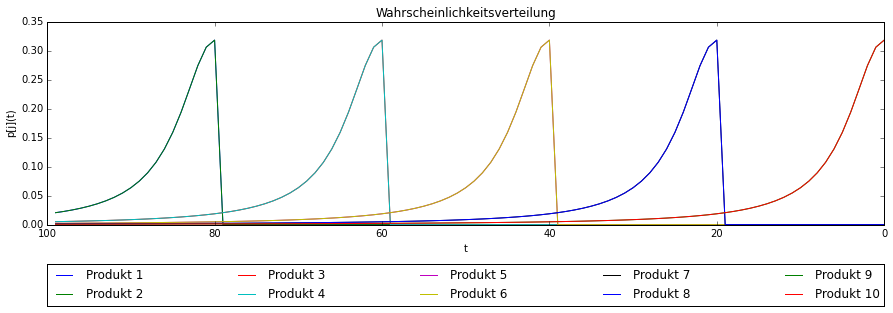

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1, figsize=(15, 8))
plt.subplot(211)
plt.gca().invert_xaxis()
for j in products[1:]:
    plt.plot(probs[j][1:].T, label="Produkt "+str(j))
plt.title("Wahrscheinlichkeitsverteilung")
plt.ylabel("p[j](t)")
plt.xlabel("t")
plt.legend(bbox_to_anchor=(0., -0.4, 1., .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0.)
plt.show
plt.draw()
plt.savefig('Wverteilung.png') 

In [48]:
from Parameter import Stock_Resource, Max_Stock_Resource, Condition_Storage

inkl. Lagerhaltung

In [7]:
#Lagerbestand
stock_resources = Stock_Resource(resources)
stock_resources[1] = 0

max_stock_resources = Max_Stock_Resource(resources)
for h in resources[1:]:
    max_stock_resources[h] = 2

# Systemzustände
condition_storages = Condition_Storage(capacities, resources, max_stock_resources, times)
# Bei der Modelformulierung mit Lagerproduktion wird der Parameter 'max_stocks' benötigt.

Rechenzeit für Systemzustände: 0:00:00.192849


In [112]:
from DynamicProgramm_Stock import DP_Stock, Structure_Stock, Opt_Politic_Stock

In [113]:
solutions={}

a = datetime.datetime.now()

DP_Stock(solutions, condition_storages, products, resources, capacities, consumtions, times, revenues, probs, stock_resources, max_stock_resources)

b = datetime.datetime.now()
print 'Rechenezeit DP:', (b-a)

c[h]: [1 1 1 1 1] - y[h]: [0 0 0 0 0] - t: 1 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 1 0] - j*: 9 - OC[j*]: 100.0
c[h]: [1 1 1 1 0] - y[h]: [0 0 0 0 0] - t: 1 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1 1 1 1] - y[h]: [0 0 0 0 0] - t: 2 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 1 1] - j*: 10 - OC[j*]: 1000.0
c[h]: [1 1 1 1 0] - y[h]: [0 0 0 0 0] - t: 2 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1 1 1 1] - y[h]: [0 0 0 0 0] - t: 3 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 1 1] - j*: 10 - OC[j*]: 1000.0
c[h]: [1 1 1 1 0] - y[h]: [0 0 0 0 0] - t: 3 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 0 0] - j*: 0 - OC[j*]: 0
c[h]: [1 1 1 1 1] - y[h]: [0 0 0 0 0] - t: 4 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 1 1] - j*: 10 - OC[j*]: 1000.0
c[h]: [1 1 1 1 0] - y[h]: [0 0 0 0 0] - t: 4 - V(c,y,t): 0.0 - d[0]: [0] - d[j]: [0 0 0 0 0 0 0 0 0 0] - j*: 0 - OC[j

KeyboardInterrupt: 

In [ ]:
graph = Structure_Stock(solutions, condition_storages, products, resources, consumtions, revenues, probs, stock_resources, max_stock_resources)

In [ ]:
Opt_Politic_Stock(solutions, resources, stock_resources, products)